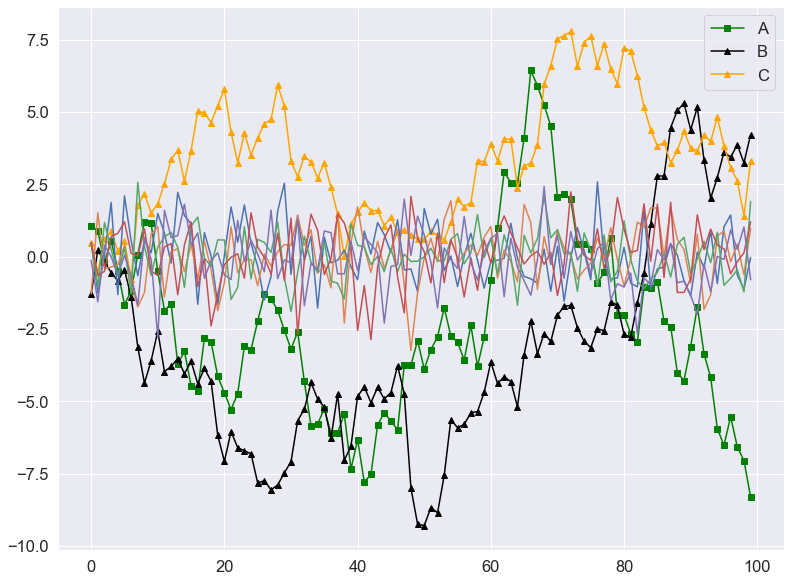

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

# index = pd.date_range(1/1/2019, periods=5)
df1= pd.DataFrame(np.random.randn(100, 5), columns=list("ABCDE"))
df2= pd.DataFrame(np.random.randn(100, 5), columns=list("ABCDE"))
rcParams['figure.figsize'] = 13, 10
plt.plot(df1.A.cumsum(), c='green', marker ='s')
plt.plot(df2.B.cumsum(), c='black', marker = '^')
plt.plot(df2.C.cumsum(), c='orange', marker = '^')

plt.legend(list("ABCDE"))

plt.plot(df2)
plt.show()

# Seaborn

In [2]:
demographic = pd.read_csv("/Users/MH/Desktop/aws/workspace/Python_for_data_science/P4-Demographic-Data.csv")
demographic.columns = [i.replace(" ","_") for i in demographic.columns]
demographic.head()

,Country_Name,Country_Code,Birth_rate,Internet_users,Income_Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [3]:
demographic.Income_Group = demographic.Income_Group.astype('category')
demographic.dtypes

Country_Name        object
Country_Code        object
Birth_rate         float64
Internet_users     float64
Income_Group      category
dtype: object

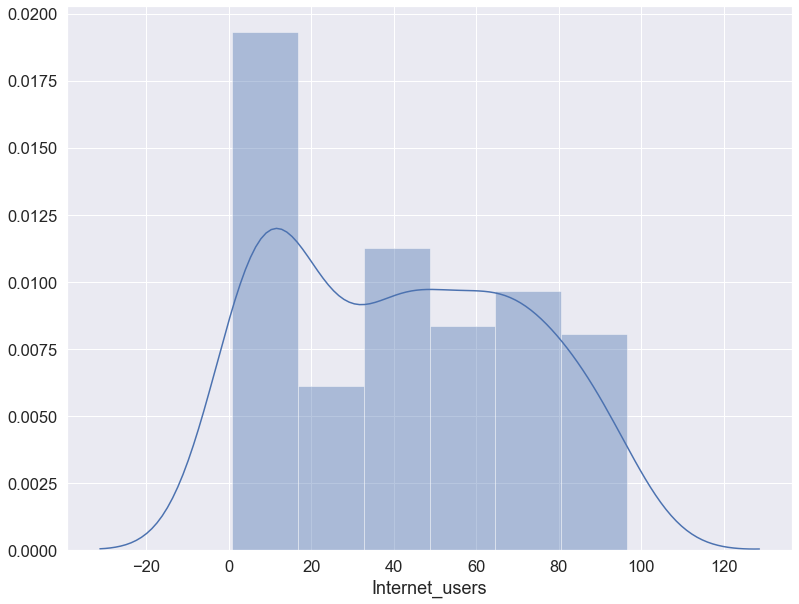

In [21]:
sns.distplot(demographic.Internet_users)

### You can use order to change the order

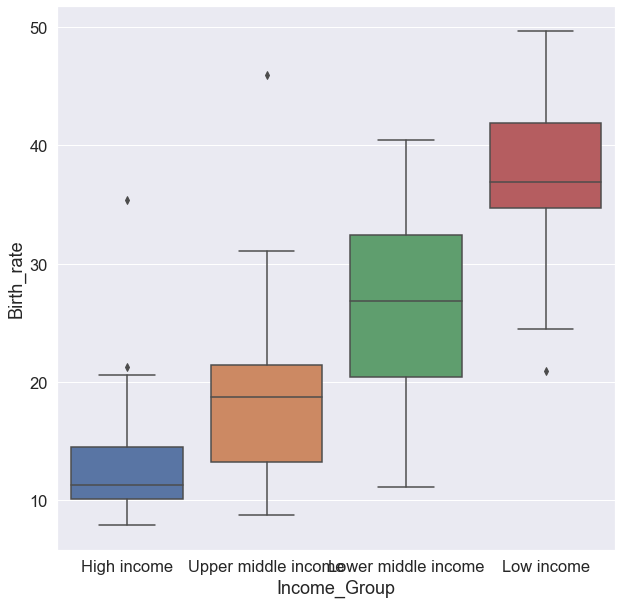

In [46]:
sns.boxplot(data=demographic, x = "Income_Group", y ="Birth_rate",order=["High income", "Upper middle income","Lower middle income","Low income"])

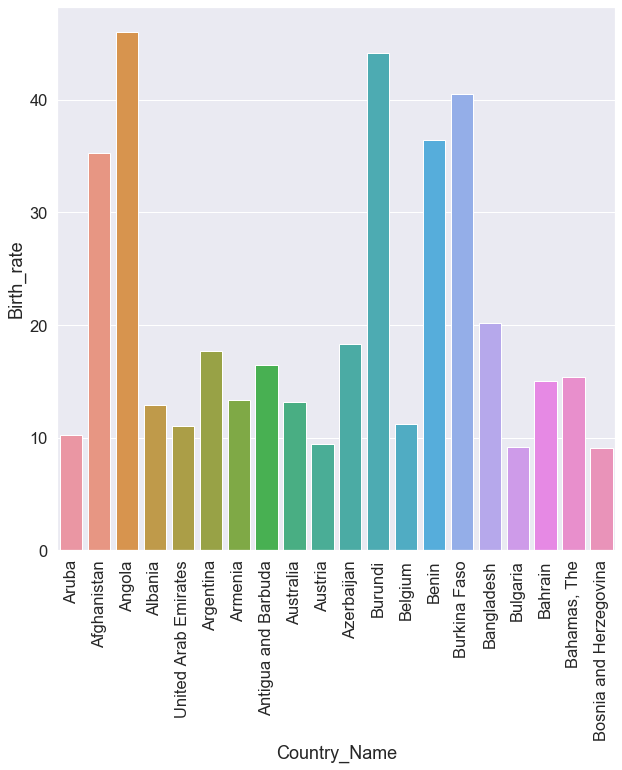

In [45]:
g = sns.barplot(x="Country_Name",y="Birth_rate",data=demographic.head(20),)
plt.xticks(rotation=90)
plt.show()

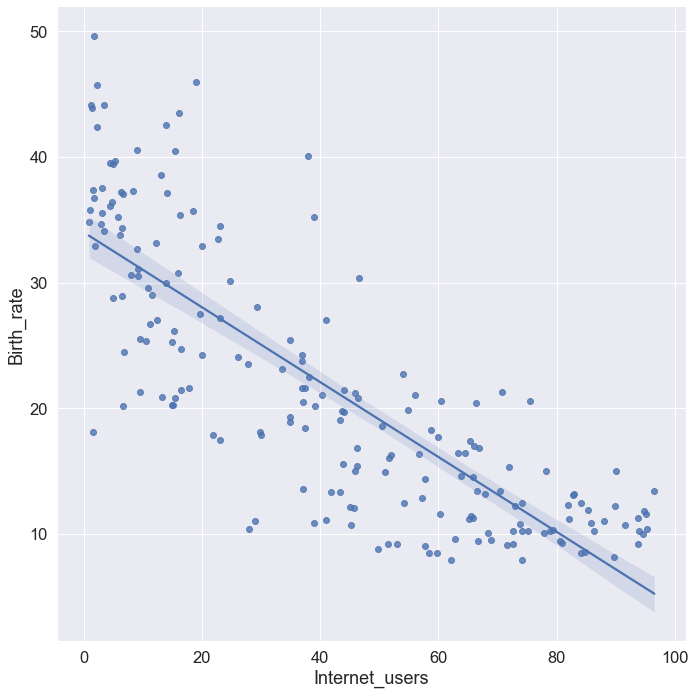

In [24]:
sns.lmplot(data = demographic, x="Internet_users", y='Birth_rate', height=10)

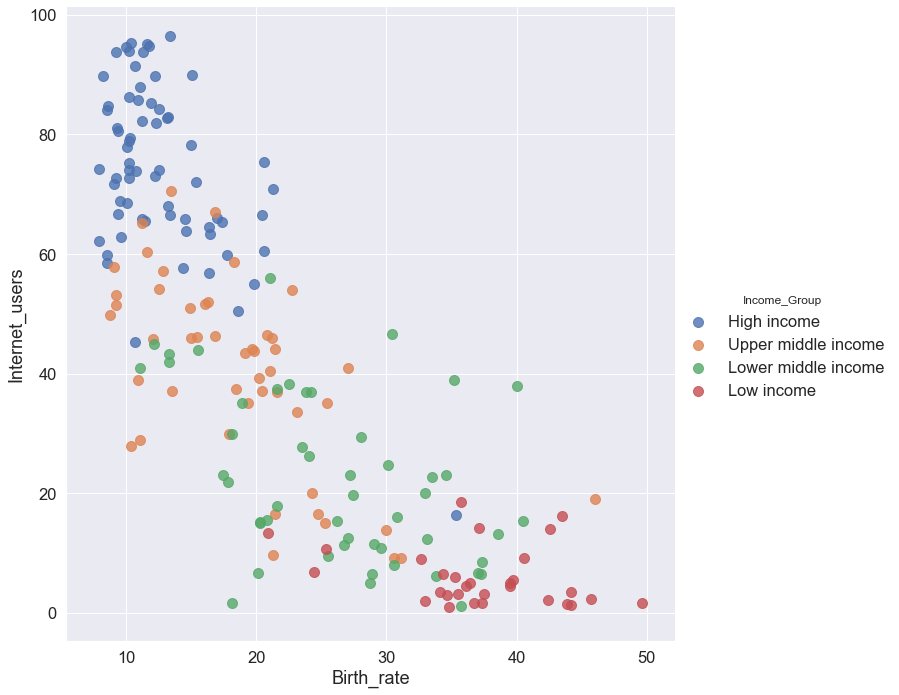

In [47]:
sns.set(font_scale=1.5)
lmplot=sns.lmplot(data = demographic, y="Internet_users", x='Birth_rate', fit_reg=False, hue="Income_Group",\
           hue_order=["High income", "Upper middle income","Lower middle income","Low income"], height=10,
                 scatter_kws={"s":100})
#scatter_kws is an implementation of matplotlib. s: 100 sets the size of the dots.

Seems like there is a relationship between the income group and the age. The higher the income group the lower the age group.

In [9]:
column_names = ['film', 'genre', 'Rotten_Tomatoes_Ratings', 'Audience_Ratings',
       'Budget_in_million', 'Year_of_release']
movies= pd.read_csv("/Users/MH/Desktop/aws/workspace/Python_for_data_science/P4-Movie-Ratings.csv", names=column_names, \
                   header=None)
movies=movies.drop([0], axis=0)

movies=movies.astype({'film':'O', 'genre':'O', 'Rotten_Tomatoes_Ratings':'int64', 'Audience_Ratings':'int64',
       'Budget_in_million':'int64', 'Year_of_release':'int64'})


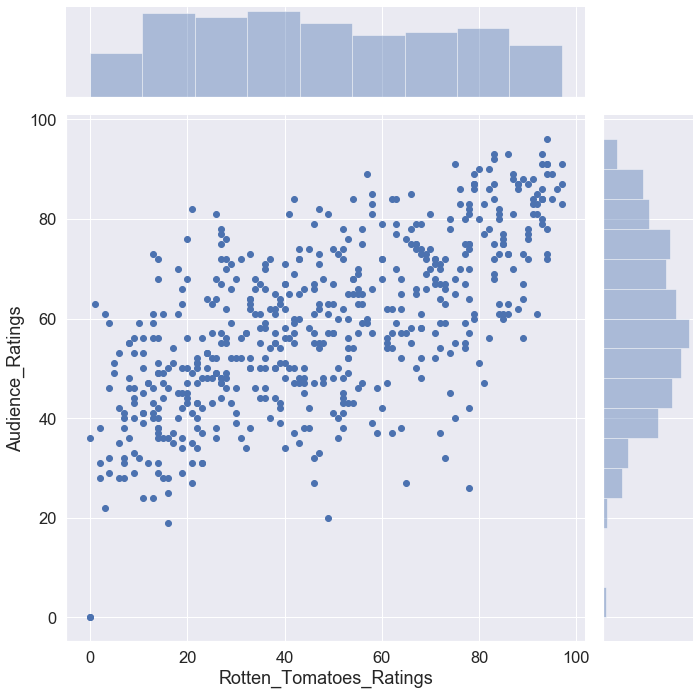

In [10]:
jointplot=sns.jointplot(data=movies, x='Rotten_Tomatoes_Ratings', y='Audience_Ratings',  height=10)

### The good thing about using hex is that you can see the dots in a group.

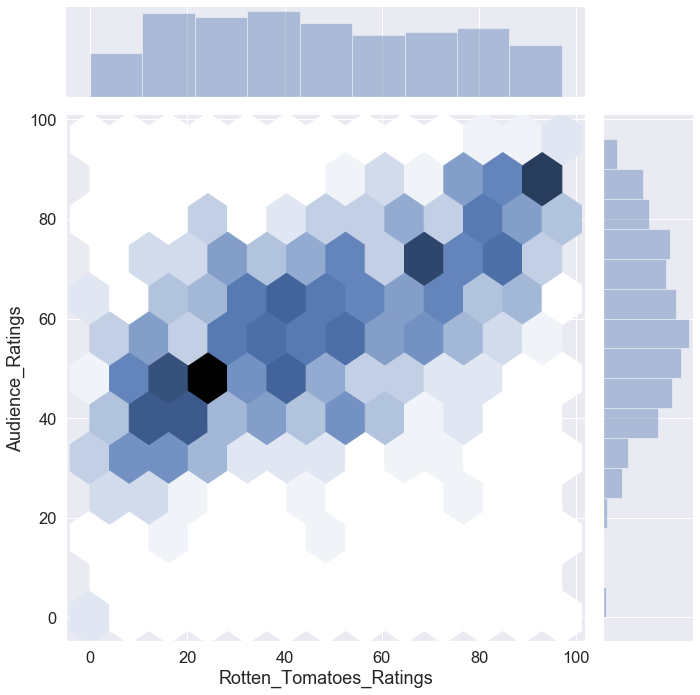

In [11]:
ajointplot=sns.jointplot(data=movies, x='Rotten_Tomatoes_Ratings', y='Audience_Ratings', kind = "hex", height=10)

### If we do not want out lines to overlap, we can use the stacked option (Check the next diagram)

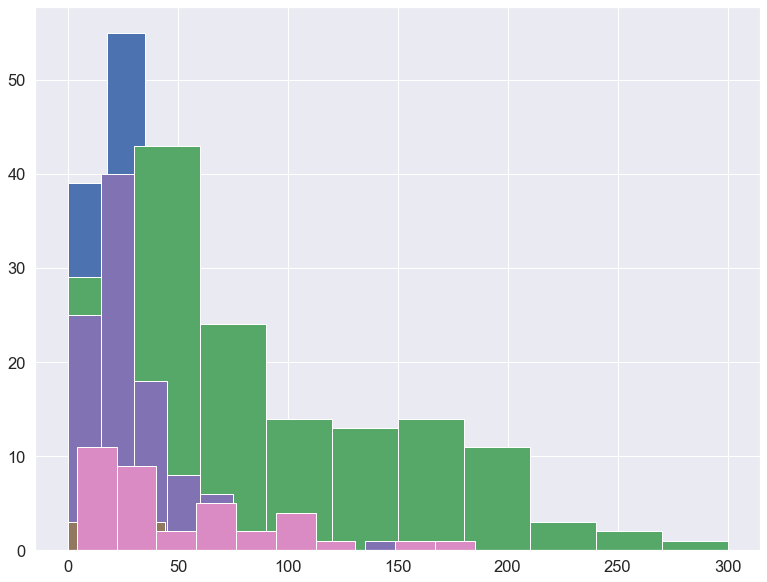

In [12]:
for i in movies.genre.unique():
    plt.hist(movies[movies.genre==i].Budget_in_million)


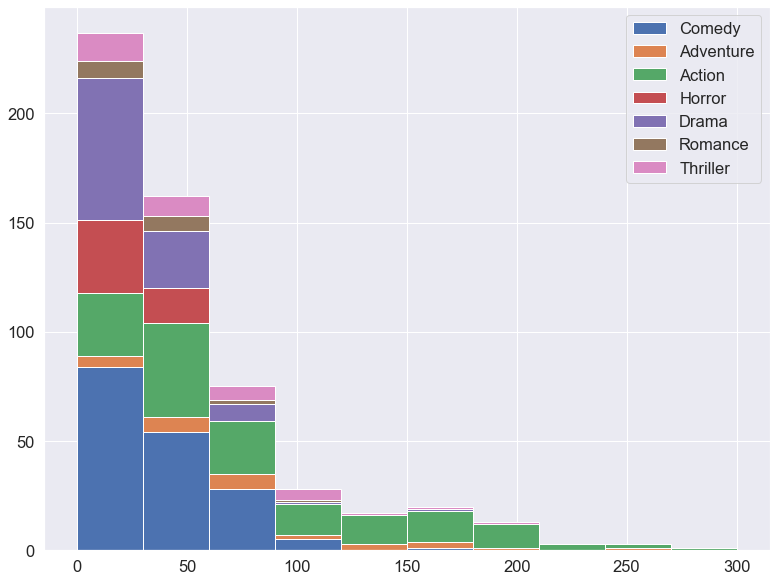

In [13]:
stack=list()
labels=list()
for i in movies.genre.unique():
    stack.append(movies[movies.genre==i].Budget_in_million)
    labels.append(i)
plt.hist(stack, stacked=True, label=labels)
plt.legend()
plt.show()

#### To make the dges more clear, its better to create 2 plots and use the shades from one and the outlines from the other.

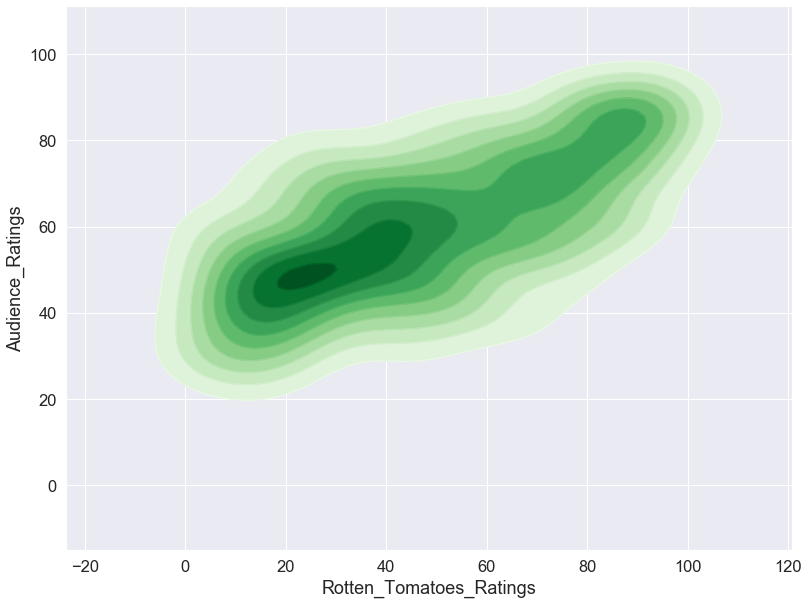

In [14]:
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings,shade=True,shade_lowest=False, cmap='Greens')
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings,cmap='Greens')

### Or if you can just leave it as one:

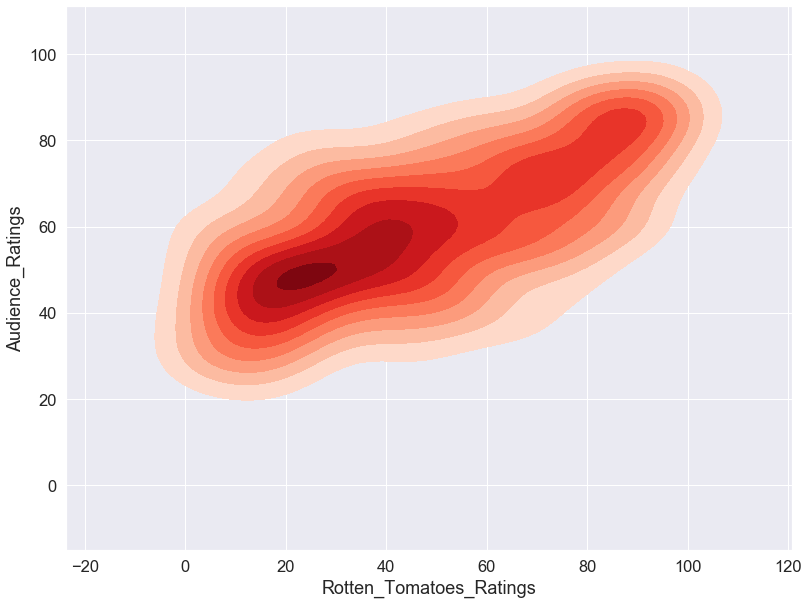

In [15]:
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings,shade=True,shade_lowest=False, cmap='Reds')

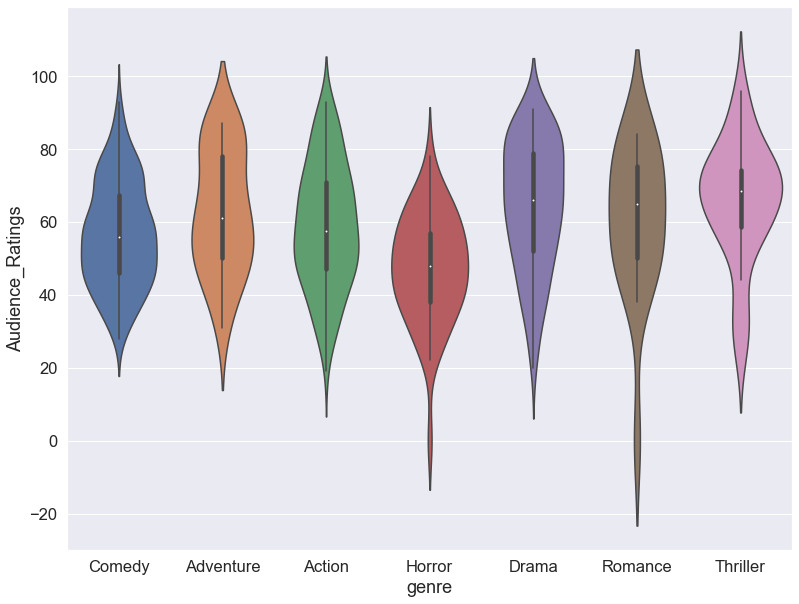

In [16]:
z = sns.violinplot(data=movies, x="genre", y="Audience_Ratings")

### So here you can see how the opinion of the audience has changed about different genre throughout the years

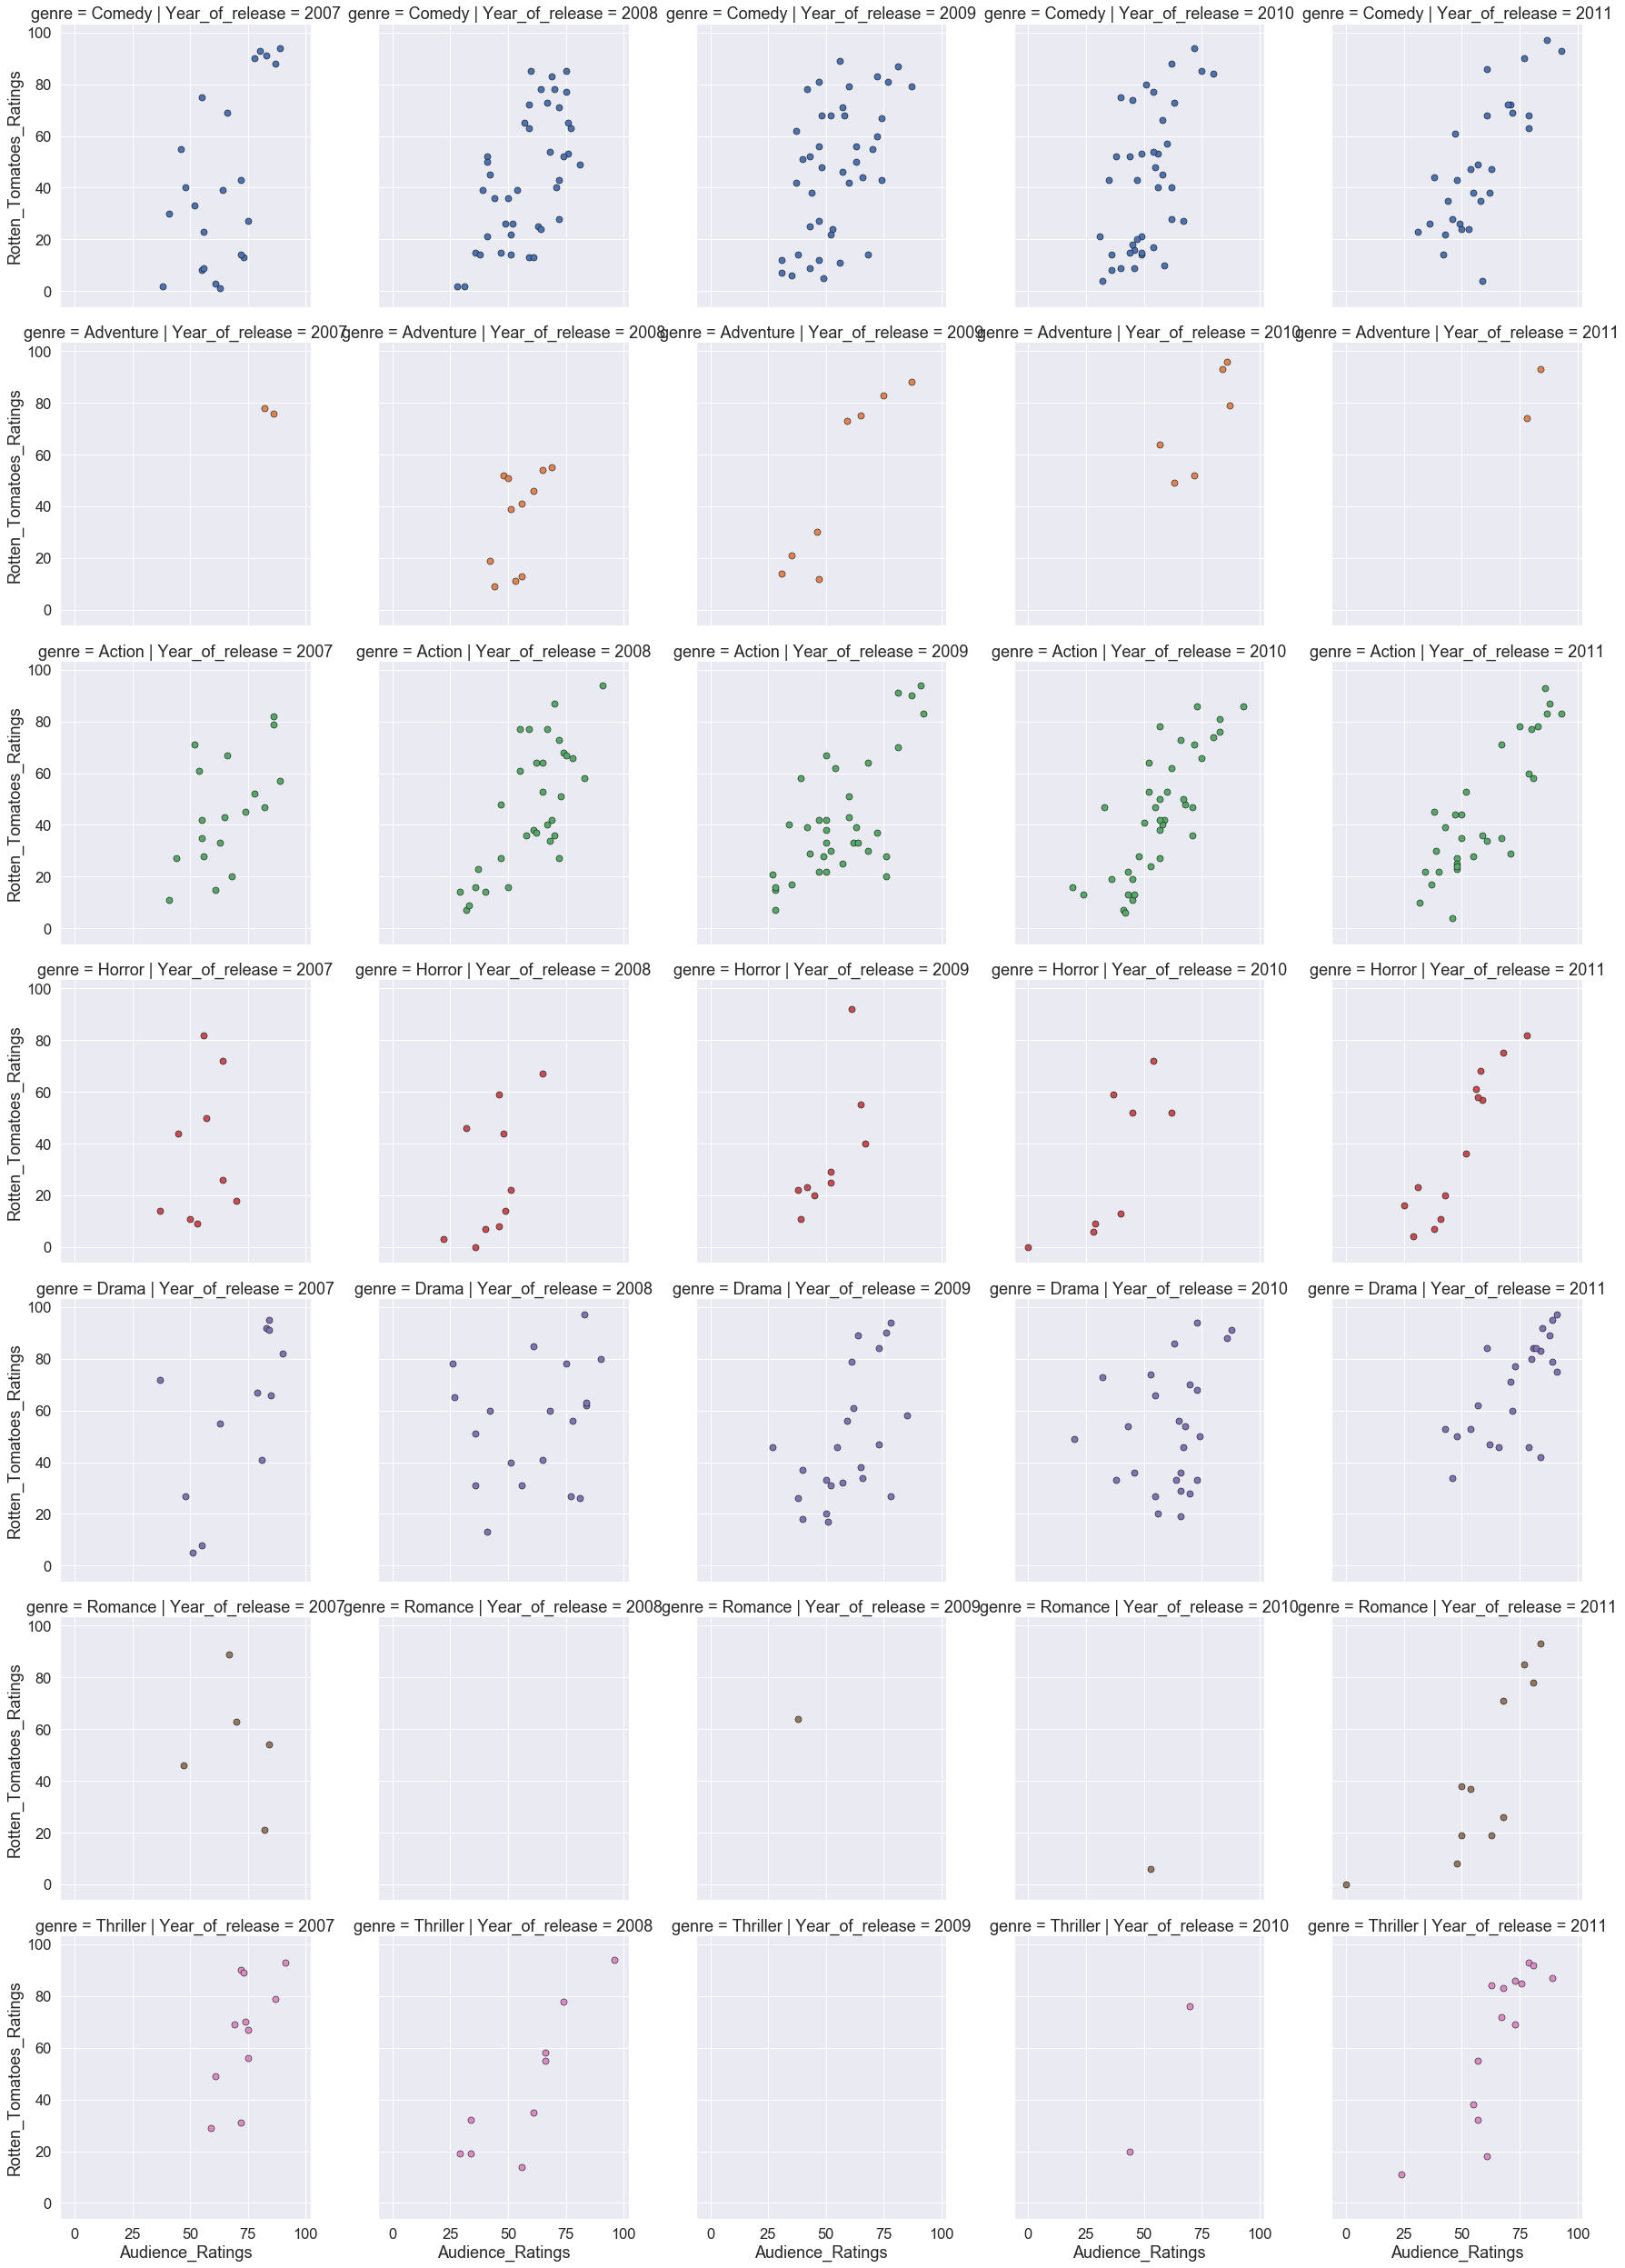

In [51]:
g = sns.FacetGrid(movies, row="genre", col='Year_of_release',hue='genre', height=5)
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter,'Audience_Ratings','Rotten_Tomatoes_Ratings',**kws)

#### Controlling axes and adding diagonals.

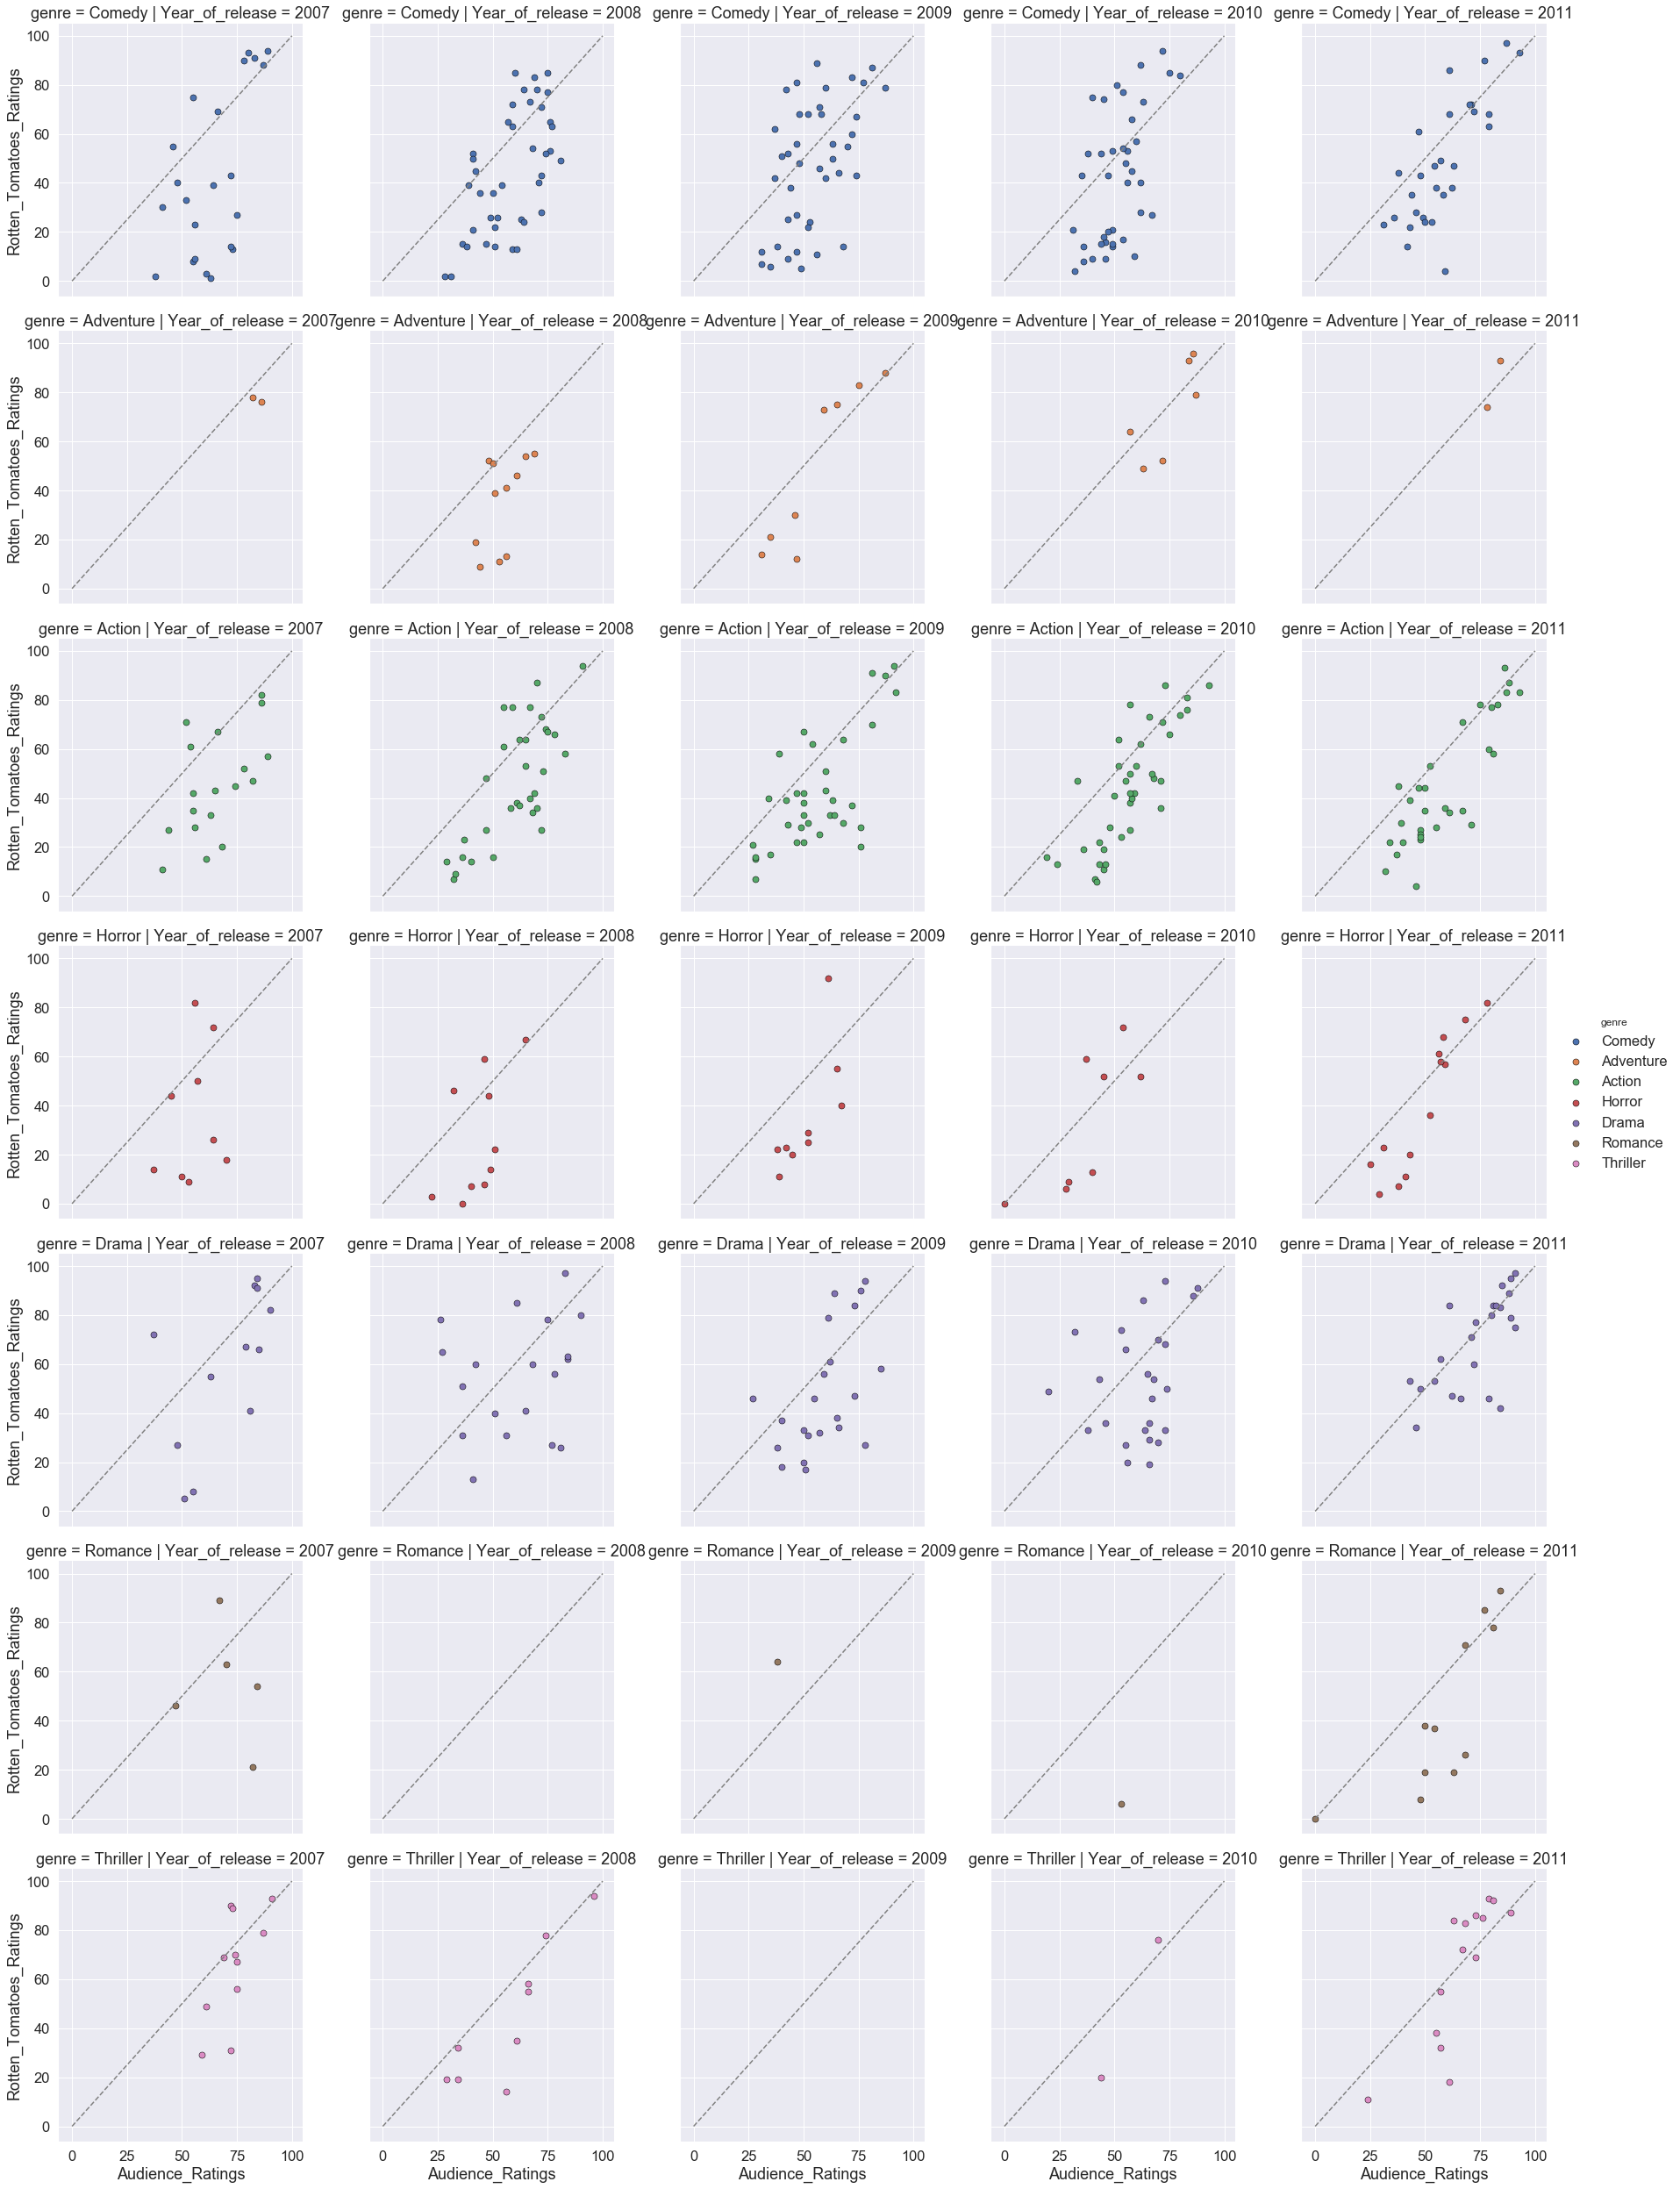

In [57]:
g = sns.FacetGrid(movies, row="genre", col='Year_of_release',hue='genre', height=5)
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter,'Audience_Ratings','Rotten_Tomatoes_Ratings',**kws)
for i in g.axes.flat:
    i.plot((0,100),(0,100), c='gray', ls="--")
g.add_legend()

### Some of the stylings

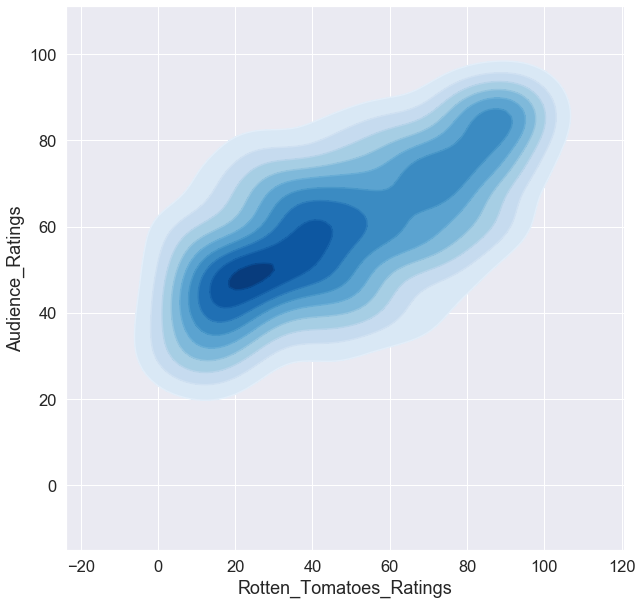

In [65]:
sns.set_style("darkgrid")
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings,shade=True,shade_lowest=False, cmap='Blues')
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings, cmap='Blues')

### You can get the list of the available style options by calling sns.axes_style(), and then pass the customized function as a dictionary.

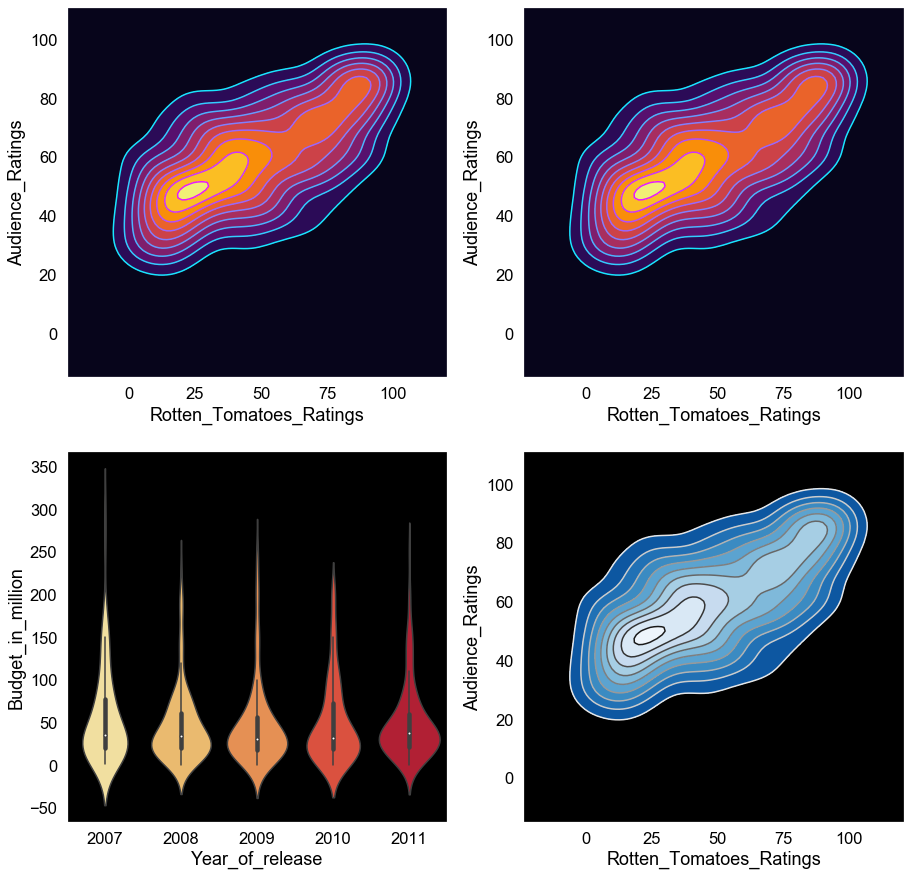

In [108]:
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black',
                'axes.grid': False,
                'axes.facecolor':'#000000'}
sns.set_style("darkgrid", rc=custom_style)

f, axes = plt.subplots(2,2,figsize=(15,15))

#[0][0]
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings,shade=True,shade_lowest=True, cmap='inferno',\
                ax= axes[0][0])
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings, cmap='cool', ax= axes[0][0])

#[0][1]
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings,shade=True,shade_lowest=True, cmap='inferno',\
                ax= axes[0][1])
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings, cmap='cool', ax= axes[0][1])
#[1][0]
z = sns.violinplot(data=movies, x="Year_of_release", y="Budget_in_million",ax=axes[1][0], palette='YlOrRd')
#[1][1]
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings,shade=True,shade_lowest=False, cmap='Blues_r',\
                ax=axes[1][1])
#[1][1]
k1 = sns.kdeplot(movies.Rotten_Tomatoes_Ratings, movies.Audience_Ratings, cmap='gist_gray_r',\
                ax=axes[1][1])




In [102]:
movies

,film,genre,Rotten_Tomatoes_Ratings,Audience_Ratings,Budget_in_million,Year_of_release
1,(500) Days of Summer,Comedy,87,81,8,2009
2,"10,000 B.C.",Adventure,9,44,105,2008
3,12 Rounds,Action,30,52,20,2009
4,127 Hours,Adventure,93,84,18,2010
5,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
555,Your Highness,Comedy,26,36,50,2011
556,Youth in Revolt,Comedy,68,52,18,2009
557,Zodiac,Thriller,89,73,65,2007
558,Zombieland,Action,90,87,24,2009


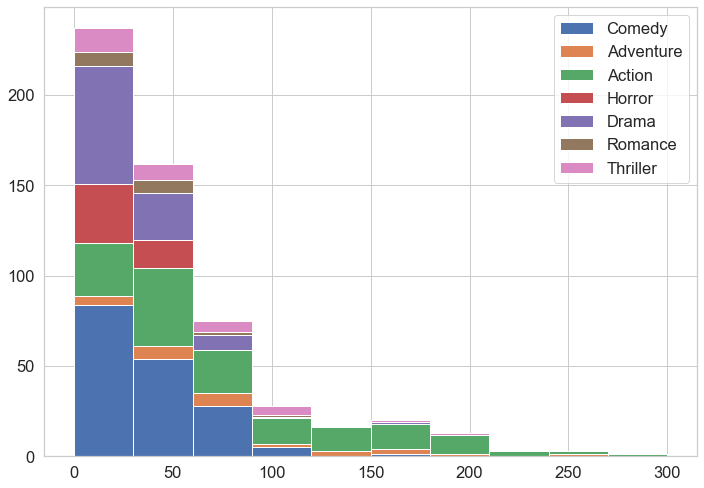

In [111]:
sns.set_style("whitegrid")
f1, ax1=plt.subplots()
f1.set_size_inches(11.7,8.27)
stack=list()
labels=list()
for i in movies.genre.unique():
    stack.append(movies[movies.genre==i].Budget_in_million)
    labels.append(i)
plt.hist(stack, stacked=True, label=labels)
plt.legend()
plt.show()